# Examples on simulated data

## Prep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

import sys,os
os.chdir('..') #change working directory

In [2]:
import numpy as np
from functools import wraps
import matplotlib.pyplot as plt

def viz_generated_data(func):
    """
    Visualizes data generated by a given function.
    
    Parameters:
        func (callable): Function that generates data (returns X, y).
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        X, y = func(*args, **kwargs)
        
        plt.figure(figsize=(6, 6))
        plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
        plt.xticks([])
        plt.yticks([])
        plt.legend()
        plt.title("Generated Data Visualization")
        plt.show()
        
        return X, y
    
    return wrapper

def generate_circular_data(n_samples=500, noise=0.1):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    r_out = 1.0
    r_in = 0.5
    theta_out = 2 * np.pi * np.random.rand(n_samples_out)
    x_out = r_out * np.cos(theta_out) + noise * np.random.randn(n_samples_out)
    y_out = r_out * np.sin(theta_out) + noise * np.random.randn(n_samples_out)
    theta_in = 2 * np.pi * np.random.rand(n_samples_in)
    x_in = r_in * np.cos(theta_in) + noise * np.random.randn(n_samples_in)
    y_in = r_in * np.sin(theta_in) + noise * np.random.randn(n_samples_in)
    X = np.vstack((np.column_stack((x_out, y_out)), np.column_stack((x_in, y_in))))
    y = np.hstack((np.ones(n_samples_out), np.zeros(n_samples_in)))
    return X, y

def generate_spiral_data(n_samples=500, noise=0.1):
    n = np.sqrt(np.random.rand(n_samples // 2)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + noise * np.random.randn(n_samples // 2)
    d1y = np.sin(n) * n + noise * np.random.randn(n_samples // 2)
    X1 = np.column_stack((d1x, d1y))
    y1 = np.zeros(n_samples // 2)
    d2x = np.cos(n) * n + noise * np.random.randn(n_samples // 2)
    d2y = -np.sin(n) * n + noise * np.random.randn(n_samples // 2)
    X2 = np.column_stack((d2x, d2y))
    y2 = np.ones(n_samples // 2)
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    return X, y

def generate_checkerboard_data(n_samples=500, grid_size=4, noise=0.1):
    x = np.random.rand(n_samples) * grid_size
    y = np.random.rand(n_samples) * grid_size
    labels = ((np.floor(x) + np.floor(y)) % 2).astype(int)
    X = np.column_stack((x, y)) + noise * np.random.randn(n_samples, 2)
    return X, labels

def generate_linearly_separable_data(n_samples=500, noise=0.1):
    X = np.random.randn(n_samples, 2)
    y = (X[:, 1] > X[:, 0]).astype(int)
    X += noise * np.random.randn(n_samples, 2)
    return X, y

@viz_generated_data
def generate_data(choice=1, n_samples=500, noise=0.1, grid_size=4):
    """
    Generates data based on user input or random selection.
    Parameters:
        choice (str or int): One of ['circular', 'spiral', 'checkerboard', 'linear'] or an integer to select by %4.
        n_samples (int): Number of samples to generate.
        noise (float): Noise level to add to the data.
        grid_size (int): Grid size for checkerboard data.
    Returns:
        X (array): Features.
        y (array): Labels.
    """
    if isinstance(choice, int):
        choice = ['circular', 'spiral', 'checkerboard', 'linear'][choice % 4]
    
    if choice == 'circular':
        print('  -- loading circular data')
        return generate_circular_data(n_samples, noise)
    elif choice == 'spiral':
        print('  -- loading spiral data')
        return generate_spiral_data(n_samples, noise)
    elif choice == 'checkerboard':
        print('  -- loading checkerboard data')
        return generate_checkerboard_data(n_samples, grid_size, noise)
    else:
        print('  -- loading linear data')
        return generate_linearly_separable_data(n_samples, noise)


## Linearly seperable

  -- loading linear data


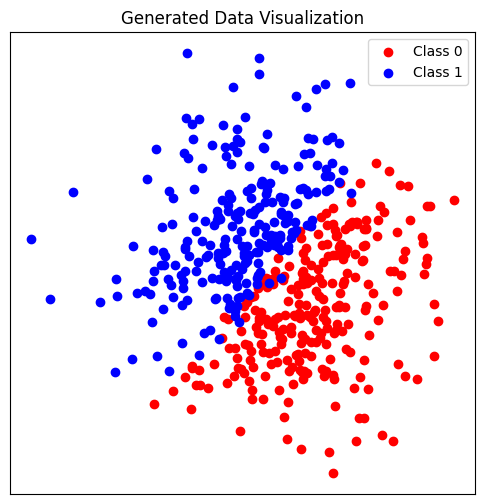

In [3]:
X, y = generate_data(choice='linear', n_samples=500, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### our lib

In [4]:
from tensor import Tensor
from dataset import TensorDataset
from module import Module
from linear import Linear
from activation import ReLU
from loss import CrossEntropyLoss,MSE
from optimizer import SGD
from transforms import Standardize, ToTensor, Compose

# -- testing if it workd on ndarray
# training_data=Tensor(X_train)
# training_labels=Tensor(y_train)
# test_data=Tensor(X_test)
# test_labels=Tensor(y_test)

transformation=Compose([ToTensor(), Standardize()])

train_dataset = TensorDataset(X_train, y_train, transform=transformation)
test_dataset = TensorDataset(X_test, y_test, transform=transformation)

print(f'train dataset of length {len(train_dataset)} and shape {train_dataset[0][0].shape}; labels shape {train_dataset[0][1].shape}')
print(f'test dataset of length {len(test_dataset)} and shape {test_dataset[0][0].shape}; labels shape {test_dataset[0][1].shape}')

print()

from dataloader import DataLoader
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=True)

for batch,(x,y) in enumerate(train_loader):
    print(f'batch {batch} data shape {x.shape}; labels shape {y.shape}')

>>> applying ToTensor()...
>>> applying Standardize(inplace=True)...
>>> [ToTensor(), Standardize(inplace=True)] applied successfully <<<
>>> applying ToTensor()...
>>> applying Standardize(inplace=True)...
>>> [ToTensor(), Standardize(inplace=True)] applied successfully <<<
train dataset of length 400 and shape (2,); labels shape ()
test dataset of length 100 and shape (2,); labels shape ()

batch 0 data shape (32, 2); labels shape (32,)
batch 1 data shape (32, 2); labels shape (32,)
batch 2 data shape (32, 2); labels shape (32,)
batch 3 data shape (32, 2); labels shape (32,)
batch 4 data shape (32, 2); labels shape (32,)
batch 5 data shape (32, 2); labels shape (32,)
batch 6 data shape (32, 2); labels shape (32,)
batch 7 data shape (32, 2); labels shape (32,)
batch 8 data shape (32, 2); labels shape (32,)
batch 9 data shape (32, 2); labels shape (32,)
batch 10 data shape (32, 2); labels shape (32,)
batch 11 data shape (32, 2); labels shape (32,)
batch 12 data shape (16, 2); labels sh

In [17]:
[np.arange(y.data.size),y.data]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])]

In [6]:
class SimpleNN(Module):
    def __init__(self):
        super().__init__()
        self.fc1=Linear(2, 5)
        self.fc2=Linear(5, 1)
        self.relu=ReLU()

    def forward(self, x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        return x
    
model = SimpleNN()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = MSE()

# -- training
for epoch in range(10):
    for batch_no,(x, y) in enumerate(train_loader):
        x.flatten_batch()
        optimizer.zero_grad()
        y_hat = model(x)
        loss = loss_fn(y, y_hat)
        loss.backward()
        optimizer.step()
        

    print(f'iteration: {epoch}')    
    print(f'Loss: {loss.data}') 
    predictions = np.argmax(y_hat.data, axis=0)
    accuracy = np.sum(predictions == y.data) / y.data.size
    print(predictions, y.data)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('------------------')

W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 32), b shape: (1, 1)
W shape: (5, 2), x shape: (2, 32), b shape: (5, 1)
W shape: (1, 5), x shape: (5, 3

/mnt/g/my_stuff/masters/saclay/courses/M1/Object-Orietnted Programming/project/src/loss.py:25: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
/mnt/g/my_stuff/masters/saclay/courses/M1/Object-Orietnted Programming/project/src/tensor.py:481: RuntimeWarning: overflow encountered in matmul
  out = Tensor(self.__data @ other.data, requires_grad=self.__requires_grad or other.requires_grad)
/mnt/g/my_stuff/masters/saclay/courses/M1/Object-Orietnted Programming/project/src/tensor.py:487: RuntimeWarning: invalid value encountered in matmul
  self.grad = grad @ other.data.T
/mnt/g/my_stuff/masters/saclay/courses/M1/Object-Orietnted Programming/project/src/tensor.py:492: RuntimeWarning: overflow encountered in matmul
  other.grad = self.__data.T @ grad
/mnt/g/my_stuff/masters/saclay/courses/M1/Object-Orietnted Programming/project/src/activation.py:34: RuntimeWarning: invalid value encountered in multiply
  x.grad = grad * relu_grad


### pytorch

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

# class SimpleNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(2, 10)
#         self.fc2 = nn.Linear(10, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x
    
# model = SimpleNN()
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# loss_fn = nn.CrossEntropyLoss()

# # -- training

# for epoch in range(10):
#     for x, y in train_loader:
#         optimizer.zero_grad()
#         y_hat = model(x)
#         loss = loss_fn(y_hat.view(-1, 2), y)
#         loss.backward()
#         optimizer.step()
        
#     print(f'iteration: {epoch}')    
#     print(f'Loss: {loss.item()}') 
#     predictions = torch.argmax(y_hat, axis=1)
#     accuracy = torch.sum(predictions == y).item() / y.size(0)
#     print(predictions, y)
#     print(f'Accuracy: {accuracy * 100:.2f}%')
#     print('------------------')

for x,y in train_loader:
    print(x.shape, y.shape)
    break


torch.Size([32, 2]) torch.Size([32])


In [12]:
y.data.size

<function Tensor.size>

In [ ]:
y.data